In [ ]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


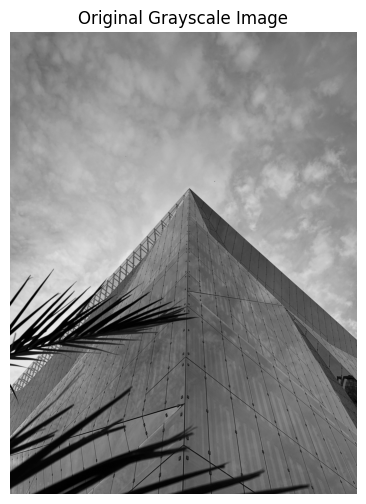

In [17]:
#Load and Display Image

# Replace with your image path
image = cv2.imread('sample-images/building1.jpg')

if image is None:
    print("Error: Image not found. Please check the path.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(6,6))
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis('off')
    plt.show()


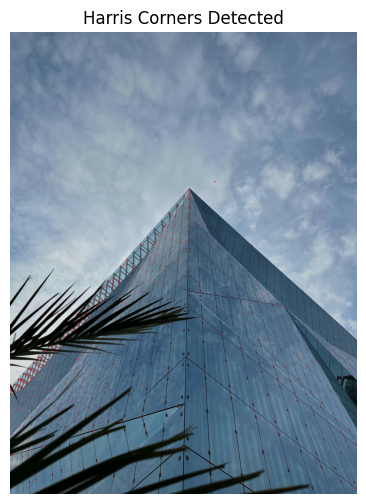

In [18]:
#Harris Corner Detection

gray_float = np.float32(gray)
dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate corner points to enhance visualization
dst = cv2.dilate(dst, None)
corner_image = image.copy()
corner_image[dst>0.01*dst.max()] = [0,0,255]  # Red corners

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners Detected")
plt.axis('off')
plt.show()


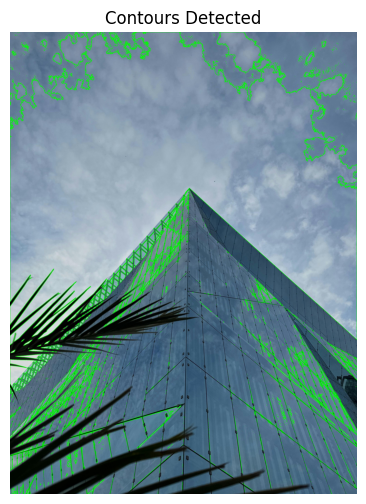

In [19]:
#Contour Detection

# Threshold to binary image for contour detection
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.axis('off')
plt.show()


In [20]:
#Shape Feature Computation

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = w / h if h != 0 else 0
    circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter != 0 else 0
    
    print(f"Contour {i+1}:")
    print(f"  Area = {area:.2f}")
    print(f"  Perimeter = {perimeter:.2f}")
    print(f"  Aspect Ratio = {aspect_ratio:.2f}")
    print(f"  Circularity = {circularity:.2f}\n")


Contour 1:
  Area = 0.00
  Perimeter = 0.00
  Aspect Ratio = 1.00
  Circularity = 0.00

Contour 2:
  Area = 0.50
  Perimeter = 3.41
  Aspect Ratio = 1.00
  Circularity = 0.54

Contour 3:
  Area = 0.00
  Perimeter = 2.00
  Aspect Ratio = 0.50
  Circularity = 0.00

Contour 4:
  Area = 0.50
  Perimeter = 5.41
  Aspect Ratio = 0.67
  Circularity = 0.21

Contour 5:
  Area = 0.00
  Perimeter = 0.00
  Aspect Ratio = 1.00
  Circularity = 0.00

Contour 6:
  Area = 0.00
  Perimeter = 2.00
  Aspect Ratio = 2.00
  Circularity = 0.00

Contour 7:
  Area = 0.00
  Perimeter = 6.83
  Aspect Ratio = 0.50
  Circularity = 0.00

Contour 8:
  Area = 0.00
  Perimeter = 0.00
  Aspect Ratio = 1.00
  Circularity = 0.00

Contour 9:
  Area = 0.00
  Perimeter = 0.00
  Aspect Ratio = 1.00
  Circularity = 0.00

Contour 10:
  Area = 3.50
  Perimeter = 13.90
  Aspect Ratio = 0.50
  Circularity = 0.23

Contour 11:
  Area = 3.00
  Perimeter = 12.83
  Aspect Ratio = 0.29
  Circularity = 0.23

Contour 12:
  Area = 0.00
  